Missing values:
 property_id      0
area             0
bedrooms         0
bathrooms        0
age              0
location         0
property_type    0
price            0
dtype: int64
Duplicates: 0
Negative prices:
 Empty DataFrame
Columns: [property_id, area, bedrooms, bathrooms, age, location, property_type, price]
Index: []
Negative area:
 Empty DataFrame
Columns: [property_id, area, bedrooms, bathrooms, age, location, property_type, price]
Index: []
              price        area    bedrooms   bathrooms         age  \
count  3.000000e+02   300.00000  300.000000  300.000000  300.000000   
mean   2.488366e+07  2759.70000    3.033333    2.026667   25.000000   
std    1.266525e+07  1297.68143    1.467219    0.792495   14.332646   
min    3.695000e+06   520.00000    1.000000    1.000000    0.000000   
25%    1.527750e+07  1675.75000    2.000000    1.000000   12.000000   
50%    2.236500e+07  2738.00000    3.000000    2.000000   25.500000   
75%    3.460812e+07  3801.25000    4.000000    

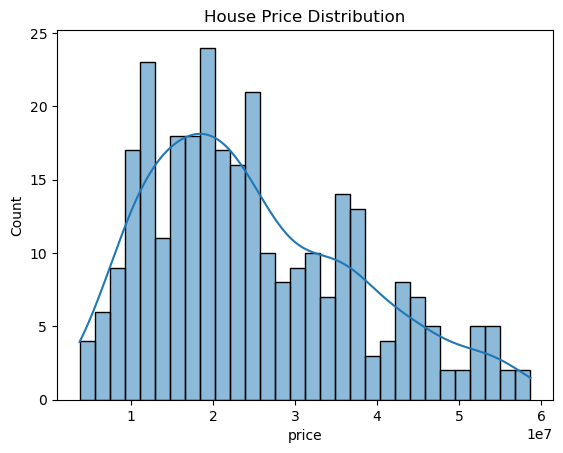

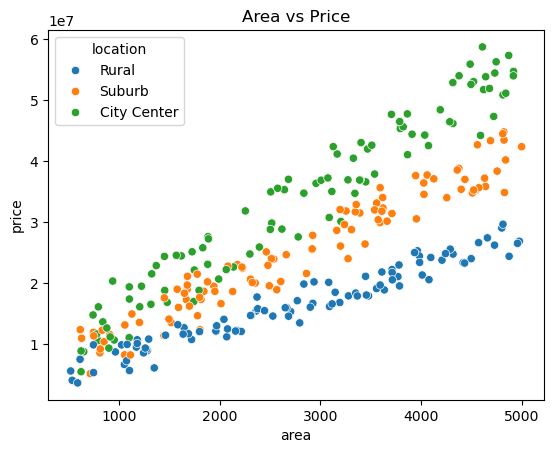

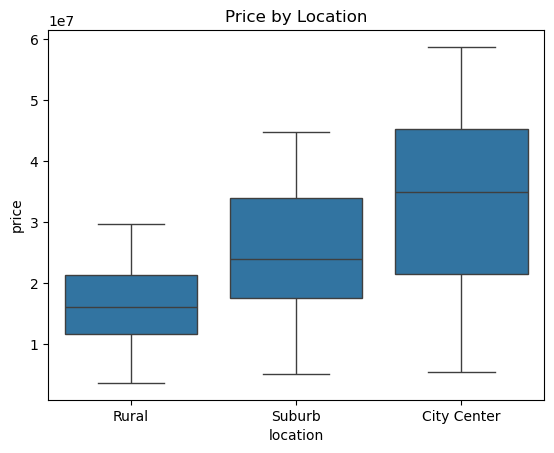

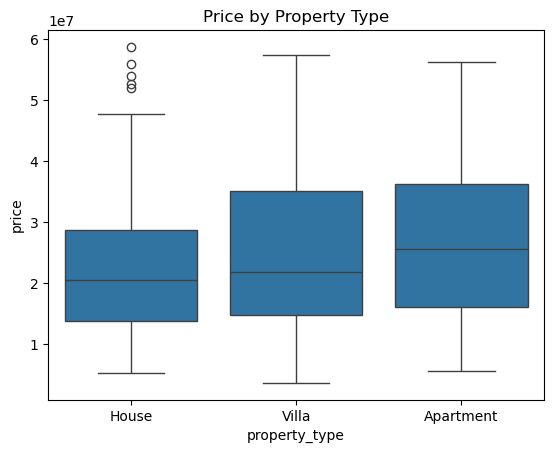

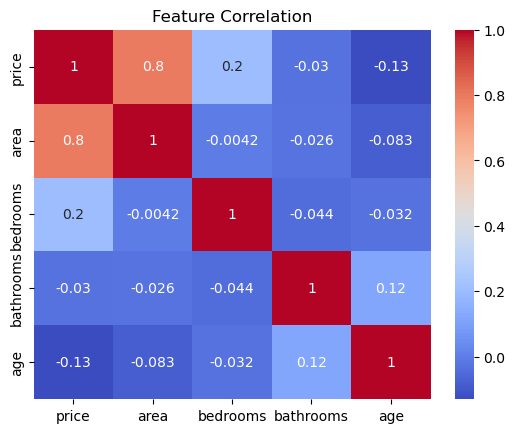


Average price by location:
 location
City Center    3.314979e+07
Suburb         2.510807e+07
Rural          1.646143e+07
Name: price, dtype: float64

Average price by property type:
 property_type
Apartment    2.712420e+07
Villa        2.498985e+07
House        2.287692e+07
Name: price, dtype: float64


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("house_prices.csv")

# Standardize columns
df.columns = df.columns.str.strip().str.lower()

# -------------------
# DATA VALIDATION
# -------------------
print("Missing values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())
print("Negative prices:\n", df[df["price"] < 0])
print("Negative area:\n", df[df["area"] < 0])

# -------------------
# FEATURE ENGINEERING (FIXED)
# -------------------
df["price_per_sqft"] = df["price"] / df["area"]

# -------------------
# DESCRIPTIVE STATS
# -------------------
print(df[["price","area","bedrooms","bathrooms","age","price_per_sqft"]].describe())

# -------------------
# ANALYSIS
# -------------------
location_prices = df.groupby("location")["price"].mean().sort_values(ascending=False)
type_prices = df.groupby("property_type")["price"].mean().sort_values(ascending=False)

# -------------------
# VISUALIZATIONS
# -------------------

sns.histplot(df["price"], bins=30, kde=True)
plt.title("House Price Distribution")
plt.show()

sns.scatterplot(data=df, x="area", y="price", hue="location")
plt.title("Area vs Price")
plt.show()

sns.boxplot(data=df, x="location", y="price")
plt.title("Price by Location")
plt.show()

sns.boxplot(data=df, x="property_type", y="price")
plt.title("Price by Property Type")
plt.show()

sns.heatmap(df[["price","area","bedrooms","bathrooms","age"]].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

# -------------------
# BUSINESS OUTPUT
# -------------------
print("\nAverage price by location:\n", location_prices)
print("\nAverage price by property type:\n", type_prices.head())
